# 🤖 Notebook 3: Machine Learning para Predicción de Precios de Casas

## 🎯 Objetivos del Notebook
En este notebook aprenderemos a:
1. **Construir un modelo de regresión lineal** desde cero
2. **Preprocesar datos** para machine learning
3. **Entrenar y evaluar** nuestro modelo
4. **Interpretar métricas** de rendimiento
5. **Visualizar resultados** y diagnósticos del modelo
6. **Crear una función de predicción** para casos nuevos

## 🧠 ¿Qué es la Regresión Lineal?
La **regresión lineal** es uno de los algoritmos más fundamentales en machine learning. Su objetivo es encontrar la mejor línea recta (o hiperplano en múltiples dimensiones) que describa la relación entre:
- **Variables independientes (X)**: Las características que usamos para predecir
- **Variable dependiente (y)**: Lo que queremos predecir (precio de la casa)


## 🔄 Pipeline de Machine Learning
Seguiremos estos pasos esenciales:
1. **Carga de datos**
2. **Preprocesamiento**
3. **División train/test**
4. **Entrenamiento del modelo**
5. **Evaluación y métricas**
6. **Diagnósticos**
7. **Predicciones**

In [4]:
# Importamos las librerías necesarias para machine learning

# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Scikit-learn: La librería principal de ML
from sklearn.model_selection import train_test_split  # Para dividir datos
from sklearn.preprocessing import StandardScaler     # Para normalizar datos
from sklearn.linear_model import LinearRegression    # Nuestro algoritmo principal

# Métricas de evaluación
from sklearn.metrics import (mean_squared_error,           # Error cuadrático medio
                           r2_score,                     # Coeficiente de determinación
                           mean_absolute_error,          # Error absoluto medio
                           mean_absolute_percentage_error, # Error porcentual absoluto medio
                           explained_variance_score)     # Varianza explicada

# Configuración de visualizaciones
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings("ignore")

print("✅ Librerías de Machine Learning importadas correctamente")

✅ Librerías de Machine Learning importadas correctamente


## 📚 1. Importación de Librerías

Importamos las librerías especializadas en machine learning:
- **scikit-learn**: La librería principal de ML en Python
- **numpy**: Para operaciones matemáticas avanzadas
- **pandas**: Para manipulación de datos
- **matplotlib/seaborn**: Para visualizaciones

## 📂 2. Carga de Datos Preparados

Cargamos el dataset limpio que preparamos en los notebooks anteriores:

In [5]:
# Cargamos el dataset limpio de los notebooks anteriores
try:
    df = pd.read_csv("../Data/USA_Housing_Clean.csv")
    print("✅ Dataset limpio cargado exitosamente")
except FileNotFoundError:
    print("⚠️ Archivo limpio no encontrado. Cargando y limpiando datos originales...")
    df = pd.read_csv("../Data/USA_Housing.csv")
    df = df.drop(columns=["Address"])
    df.to_csv("../Data/USA_Housing_Clean.csv", index=False)
    print("✅ Datos cargados y limpiados")

print(f"\n📊 Información del Dataset:")
print(f"   • Filas: {df.shape[0]:,}")
print(f"   • Columnas: {df.shape[1]}")
print(f"   • Variables predictoras: {df.shape[1]-1}")
print(f"   • Variable objetivo: Price")

# Verificamos que no hay valores faltantes
print(f"\n🔍 Verificación de calidad:")
print(f"   • Valores faltantes: {df.isnull().sum().sum()}")
print(f"   • Duplicados: {df.duplicated().sum()}")

# Vista previa de los datos
print("\n👀 Vista previa de los datos:")
df.head()

✅ Dataset limpio cargado exitosamente

📊 Información del Dataset:
   • Filas: 5,000
   • Columnas: 6
   • Variables predictoras: 5
   • Variable objetivo: Price

🔍 Verificación de calidad:
   • Valores faltantes: 0
   • Duplicados: 0

👀 Vista previa de los datos:


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


## 🎯 3. Selección de Variables (Feature Selection)

### 💡 ¿Por qué es importante la selección de variables?
- **Relevancia**: Solo incluimos variables que realmente influyen en el precio
- **Multicolinealidad**: Evitamos variables que se correlacionan mucho entre sí
- **Simplicidad**: Un modelo más simple es más fácil de interpretar
- **Overfitting**: Menos variables reducen el riesgo de sobreajuste

### 🔍 Nuestras Variables Seleccionadas:
1. **Avg. Area Income** 💰 - Ingreso promedio del área
2. **Avg. Area House Age** 🏠 - Edad promedio de las casas
3. **Avg. Area Number of Rooms** 🚪 - Número promedio de habitaciones
4. **Avg. Area Number of Bedrooms** 🛏️ - Número promedio de dormitorios
5. **Area Population** 👥 - Población del área

In [6]:
# Definimos nuestras variables predictoras (X) y objetivo (y)

# Variables independientes (Features/Predictores)
feature_columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 
                  'Avg. Area Number of Bedrooms', 'Area Population']
X = df[feature_columns]

# Variable dependiente (Target/Objetivo)
y = df['Price']

print("🎯 VARIABLES SELECCIONADAS PARA EL MODELO:")
print("=" * 50)
print("\n📊 Variables Predictoras (X):")
for i, feature in enumerate(feature_columns, 1):
    correlation = df[feature].corr(y)
    print(f"   {i}. {feature}")
    print(f"      • Correlación con precio: r = {correlation:.3f}")
    print(f"      • Rango: {X[feature].min():.1f} - {X[feature].max():.1f}")
    print()

print(f"🎯 Variable Objetivo (y): Price")
print(f"   • Rango: ${y.min():,.0f} - ${y.max():,.0f}")
print(f"   • Media: ${y.mean():,.2f}")
print(f"   • Desviación estándar: ${y.std():,.2f}")

print(f"\n📏 Forma de los datos:")
print(f"   • X (predictoras): {X.shape}")
print(f"   • y (objetivo): {y.shape}")

🎯 VARIABLES SELECCIONADAS PARA EL MODELO:

📊 Variables Predictoras (X):
   1. Avg. Area Income
      • Correlación con precio: r = 0.640
      • Rango: 17796.6 - 107701.7

   2. Avg. Area House Age
      • Correlación con precio: r = 0.453
      • Rango: 2.6 - 9.5

   3. Avg. Area Number of Rooms
      • Correlación con precio: r = 0.336
      • Rango: 3.2 - 10.8

   4. Avg. Area Number of Bedrooms
      • Correlación con precio: r = 0.171
      • Rango: 2.0 - 6.5

   5. Area Population
      • Correlación con precio: r = 0.409
      • Rango: 172.6 - 69621.7

🎯 Variable Objetivo (y): Price
   • Rango: $15,939 - $2,469,066
   • Media: $1,232,072.65
   • Desviación estándar: $353,117.63

📏 Forma de los datos:
   • X (predictoras): (5000, 5)
   • y (objetivo): (5000,)


## ⚖️ 4. Normalización de Datos (Feature Scaling)

### 🤔 ¿Por qué normalizar?
La **normalización** es crucial porque nuestras variables tienen diferentes escalas:
- **Ingreso**: $20,000 - $100,000+ (números grandes)
- **Edad de casa**: 2-10 años (números pequeños)
- **Habitaciones**: 3-10 (números muy pequeños)

### 📐 StandardScaler (Z-score normalization):
```
z = (x - μ) / σ
```
Donde:
- **x** = valor original
- **μ** = media
- **σ** = desviación estándar
- **z** = valor normalizado

### ✅ Beneficios:
- Todas las variables tienen la misma escala (media=0, std=1)
- El algoritmo converge más rápido
- Evita que variables con números grandes dominen el modelo

In [7]:
# Aplicamos normalización StandardScaler a nuestras variables predictoras

print("📊 ANTES DE LA NORMALIZACIÓN:")
print("=" * 40)
print("Estadísticas de las variables originales:")
print(X.describe().round(2))

# Creamos el objeto StandardScaler
scaler = StandardScaler()

# Ajustamos (fit) y transformamos los datos
# fit(): Calcula la media y desviación estándar de cada variable
# transform(): Aplica la normalización usando la fórmula z = (x - μ) / σ
X_scaled = scaler.fit_transform(X)

# Convertimos de vuelta a DataFrame para mejor visualización
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)

print("\n📊 DESPUÉS DE LA NORMALIZACIÓN:")
print("=" * 40)
print("Estadísticas de las variables normalizadas:")
print(X_scaled_df.describe().round(3))

print("\n🔍 VERIFICACIÓN DE NORMALIZACIÓN:")
print("=" * 40)
for i, feature in enumerate(feature_columns):
    media_original = X[feature].mean()
    std_original = X[feature].std()
    media_normalizada = X_scaled_df[feature].mean()
    std_normalizada = X_scaled_df[feature].std()
    
    print(f"{feature}:")
    print(f"   Original: μ={media_original:.2f}, σ={std_original:.2f}")
    print(f"   Normalizada: μ={media_normalizada:.3f}, σ={std_normalizada:.3f}")
    print()

print("✅ Normalización completada exitosamente")
print("💡 Todas las variables ahora tienen media ≈ 0 y desviación estándar ≈ 1")

📊 ANTES DE LA NORMALIZACIÓN:
Estadísticas de las variables originales:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count           5000.00              5000.00                    5000.00   
mean           68583.11                 5.98                       6.99   
std            10657.99                 0.99                       1.01   
min            17796.63                 2.64                       3.24   
25%            61480.56                 5.32                       6.30   
50%            68804.29                 5.97                       7.00   
75%            75783.34                 6.65                       7.67   
max           107701.75                 9.52                      10.76   

       Avg. Area Number of Bedrooms  Area Population  
count                       5000.00          5000.00  
mean                           3.98         36163.52  
std                            1.23          9925.65  
min                            2.

## 📊 5. División de Datos (Train-Test Split)

### 🎯 ¿Por qué dividir los datos?
- **Entrenamiento (70%)**: Para que el modelo aprenda los patrones
- **Prueba (30%)**: Para evaluar el rendimiento en datos "no vistos"

### 🔑 Conceptos Clave:
- **Overfitting**: El modelo memoriza los datos de entrenamiento pero falla con datos nuevos
- **Generalization**: Capacidad del modelo para funcionar bien con datos nuevos
- **Random State**: Semilla para reproducibilidad (mismos resultados siempre)

### 📏 Nuestra División:
- 70% para entrenamiento (aprende patrones)
- 30% para prueba (evalúa rendimiento)

In [8]:
# Dividimos nuestros datos en conjuntos de entrenamiento y prueba

# Aplicamos train_test_split con los parámetros recomendados
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,           # Variables predictoras normalizadas
    y,                  # Variable objetivo (sin normalizar)
    test_size=0.3,      # 30% para prueba, 70% para entrenamiento
    random_state=42,    # Semilla para reproducibilidad
    shuffle=True        # Mezclar los datos antes de dividir
)

print("📊 DIVISIÓN DE DATOS COMPLETADA:")
print("=" * 50)
print(f"📈 Conjunto de ENTRENAMIENTO:")
print(f"   • X_train: {X_train.shape} (variables predictoras)")
print(f"   • y_train: {y_train.shape} (variable objetivo)")
print(f"   • Porcentaje: {len(X_train)/len(X)*100:.1f}% del total")

print(f"\n🧪 Conjunto de PRUEBA:")
print(f"   • X_test: {X_test.shape} (variables predictoras)")
print(f"   • y_test: {y_test.shape} (variable objetivo)")
print(f"   • Porcentaje: {len(X_test)/len(X)*100:.1f}% del total")

print(f"\n📏 VERIFICACIÓN DE LA DIVISIÓN:")
print(f"   • Total de observaciones: {len(X):,}")
print(f"   • Entrenamiento + Prueba: {len(X_train) + len(X_test):,}")
print(f"   • Verificación: {len(X_train) + len(X_test) == len(X)} ✅")

# Estadísticas de la variable objetivo en cada conjunto
print(f"\n💰 ESTADÍSTICAS DEL PRECIO POR CONJUNTO:")
print(f"   Entrenamiento - Media: ${y_train.mean():,.2f}, Std: ${y_train.std():,.2f}")
print(f"   Prueba -       Media: ${y_test.mean():,.2f}, Std: ${y_test.std():,.2f}")

# Verificamos que las distribuciones sean similares
diff_media = abs(y_train.mean() - y_test.mean())
print(f"   Diferencia en media: ${diff_media:.2f} ({'✅ Buena división' if diff_media < y.std()/10 else '⚠️ Revisar división'})")

📊 DIVISIÓN DE DATOS COMPLETADA:
📈 Conjunto de ENTRENAMIENTO:
   • X_train: (3500, 5) (variables predictoras)
   • y_train: (3500,) (variable objetivo)
   • Porcentaje: 70.0% del total

🧪 Conjunto de PRUEBA:
   • X_test: (1500, 5) (variables predictoras)
   • y_test: (1500,) (variable objetivo)
   • Porcentaje: 30.0% del total

📏 VERIFICACIÓN DE LA DIVISIÓN:
   • Total de observaciones: 5,000
   • Entrenamiento + Prueba: 5,000
   • Verificación: True ✅

💰 ESTADÍSTICAS DEL PRECIO POR CONJUNTO:
   Entrenamiento - Media: $1,228,219.15, Std: $357,081.17
   Prueba -       Media: $1,241,064.17, Std: $343,640.87
   Diferencia en media: $12845.02 (✅ Buena división)


## 🤖 6. Construcción del Modelo de Regresión Lineal

### 🧠 ¿Cómo funciona la Regresión Lineal?
La regresión lineal busca la **mejor línea** (o hiperplano) que minimice el error entre:
- Valores **reales** (y)
- Valores **predichos** (ŷ)

### 🎯 Objetivo: Minimizar el Error
El algoritmo utiliza el **método de mínimos cuadrados** para encontrar los mejores coeficientes:
```
Minimizar: Σ(y_real - y_predicho)²
```

### 📊 Interpretación de Coeficientes:
- **Coeficiente positivo**: ↗️ Aumenta el precio
- **Coeficiente negativo**: ↘️ Disminuye el precio
- **Magnitud**: Qué tanto impacta cada variable

In [ ]:
# 🏗️ CREACIÓN Y ENTRENAMIENTO DEL MODELO

# 1. Creamos nuestro modelo de regresión lineal
print("🤖 Creando el modelo de Regresión Lineal...")
modelo = LinearRegression()

# 2. Entrenamos el modelo con nuestros datos de entrenamiento
print("📚 Entrenando el modelo...")
print(f"   - Datos de entrenamiento: {X_train.shape[0]:,} casas")
print(f"   - Características utilizadas: {X_train.shape[1]} variables")

# El método fit() encuentra los mejores coeficientes para minimizar el error
modelo.fit(X_train, y_train)

print("✅ ¡Modelo entrenado exitosamente!")
print("="*50)

# 3. Examinamos los coeficientes aprendidos por el modelo
print("🔍 ANÁLISIS DE COEFICIENTES:")
print("(Cómo cada variable afecta el precio de la casa)")
print("-" * 50)

# Obtenemos los nombres de las características y sus coeficientes
caracteristicas = feature_columns  # Usamos la lista original de nombres
coeficientes = modelo.coef_

# Creamos un DataFrame para visualizar mejor los coeficientes
coef_df = pd.DataFrame({
    'Variable': caracteristicas,
    'Coeficiente': coeficientes,
    'Impacto': ['↗️ Aumenta precio' if coef > 0 else '↘️ Disminuye precio' for coef in coeficientes]
})

# Ordenamos por magnitud del impacto
coef_df['Magnitud'] = abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values('Magnitud', ascending=False)

print(coef_df[['Variable', 'Coeficiente', 'Impacto']].to_string(index=False))

print(f"\n📏 Intercepto (precio base): ${modelo.intercept_:,.2f}")
print("\n💡 Interpretación:")
print("- El intercepto es el precio cuando todas las variables = 0")
print("- Los coeficientes muestran cuánto cambia el precio por unidad de cada variable")

🤖 Creando el modelo de Regresión Lineal...
📚 Entrenando el modelo...
   - Datos de entrenamiento: 3,500 casas
   - Características utilizadas: 5 variables
✅ ¡Modelo entrenado exitosamente!
🔍 ANÁLISIS DE COEFICIENTES:
(Cómo cada variable afecta el precio de la casa)
--------------------------------------------------
                    Variable   Coeficiente           Impacto
            Avg. Area Income 230464.525202 ↗️ Aumenta precio
         Avg. Area House Age 164159.199826 ↗️ Aumenta precio
             Area Population 151019.358652 ↗️ Aumenta precio
   Avg. Area Number of Rooms 120514.713284 ↗️ Aumenta precio
Avg. Area Number of Bedrooms   2913.624245 ↗️ Aumenta precio

📏 Intercepto (precio base): $1,231,278.64

💡 Interpretación:
- El intercepto es el precio cuando todas las variables = 0
- Los coeficientes muestran cuánto cambia el precio por unidad de cada variable


## 📊 7. Predicciones y Evaluación del Modelo

### 🔮 Realizando Predicciones
Una vez entrenado, nuestro modelo puede predecir precios de casas que nunca ha visto antes.

### 📏 Métricas de Evaluación que utilizaremos:

1. **R² (Coeficiente de Determinación)**: 0-1, donde 1 = predicción perfecta
2. **MAE (Error Absoluto Medio)**: Promedio de errores en dólares
3. **MSE (Error Cuadrático Medio)**: Penaliza más los errores grandes
4. **RMSE (Raíz del MSE)**: En la misma unidad que el precio (dólares)

In [11]:
# 🔮 REALIZANDO PREDICCIONES

print("🔮 Realizando predicciones en datos de entrenamiento...")
y_pred_train = modelo.predict(X_train)

print("🧪 Realizando predicciones en datos de prueba...")
y_pred_test = modelo.predict(X_test)

print(f"✅ Predicciones completadas:")
print(f"   - Entrenamiento: {len(y_pred_train):,} predicciones")
print(f"   - Prueba: {len(y_pred_test):,} predicciones")
print("="*50)

# 📊 EVALUACIÓN DEL MODELO
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("📊 MÉTRICAS DE EVALUACIÓN:")
print("="*50)

# Métricas para datos de ENTRENAMIENTO
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

print("🏋️ RENDIMIENTO EN ENTRENAMIENTO:")
print(f"   R² Score:    {r2_train:.4f} ({r2_train*100:.2f}% de varianza explicada)")
print(f"   MAE:         ${mae_train:,.2f}")
print(f"   MSE:         ${mse_train:,.2f}")
print(f"   RMSE:        ${rmse_train:,.2f}")

print()

# Métricas para datos de PRUEBA
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("🧪 RENDIMIENTO EN PRUEBA:")
print(f"   R² Score:    {r2_test:.4f} ({r2_test*100:.2f}% de varianza explicada)")
print(f"   MAE:         ${mae_test:,.2f}")
print(f"   MSE:         ${mse_test:,.2f}")
print(f"   RMSE:        ${rmse_test:,.2f}")

print()
print("🎯 INTERPRETACIÓN DE RESULTADOS:")
print(f"   - El modelo explica {r2_test*100:.1f}% de la variación en precios")
print(f"   - Error promedio: ±${mae_test:,.0f}")
print(f"   - En promedio, nos equivocamos por ${rmse_test:,.0f}")

# Análisis de overfitting
print("\n🔍 ANÁLISIS DE SOBREAJUSTE (Overfitting):")
print(f"   - R² Entrenamiento: {r2_train:.4f}")
print(f"   - R² Prueba:        {r2_test:.4f}")
print(f"   - Diferencia:       {abs(r2_train - r2_test):.4f}")

if abs(r2_train - r2_test) < 0.05:
    print("   ✅ Buen balance: No hay sobreajuste significativo")
elif r2_train > r2_test + 0.1:
    print("   ⚠️  Posible sobreajuste: El modelo funciona mucho mejor en entrenamiento")
else:
    print("   ✅ El modelo generaliza bien a datos nuevos")

🔮 Realizando predicciones en datos de entrenamiento...
🧪 Realizando predicciones en datos de prueba...
✅ Predicciones completadas:
   - Entrenamiento: 3,500 predicciones
   - Prueba: 1,500 predicciones
📊 MÉTRICAS DE EVALUACIÓN:
🏋️ RENDIMIENTO EN ENTRENAMIENTO:
   R² Score:    0.9193 (91.93% de varianza explicada)
   MAE:         $81,480.50
   MSE:         $10,287,043,161.20
   RMSE:        $101,425.06

🧪 RENDIMIENTO EN PRUEBA:
   R² Score:    0.9147 (91.47% de varianza explicada)
   MAE:         $81,135.57
   MSE:         $10,068,422,551.40
   RMSE:        $100,341.53

🎯 INTERPRETACIÓN DE RESULTADOS:
   - El modelo explica 91.5% de la variación en precios
   - Error promedio: ±$81,136
   - En promedio, nos equivocamos por $100,342

🔍 ANÁLISIS DE SOBREAJUSTE (Overfitting):
   - R² Entrenamiento: 0.9193
   - R² Prueba:        0.9147
   - Diferencia:       0.0046
   ✅ Buen balance: No hay sobreajuste significativo


## 📈 8. Visualización de Resultados del Modelo

### 🎨 Diagnóstico Visual
Las visualizaciones nos ayudan a:
- **Evaluar la precisión** de nuestras predicciones
- **Identificar patrones** en los errores
- **Detectar outliers** o casos problemáticos
- **Validar supuestos** del modelo lineal

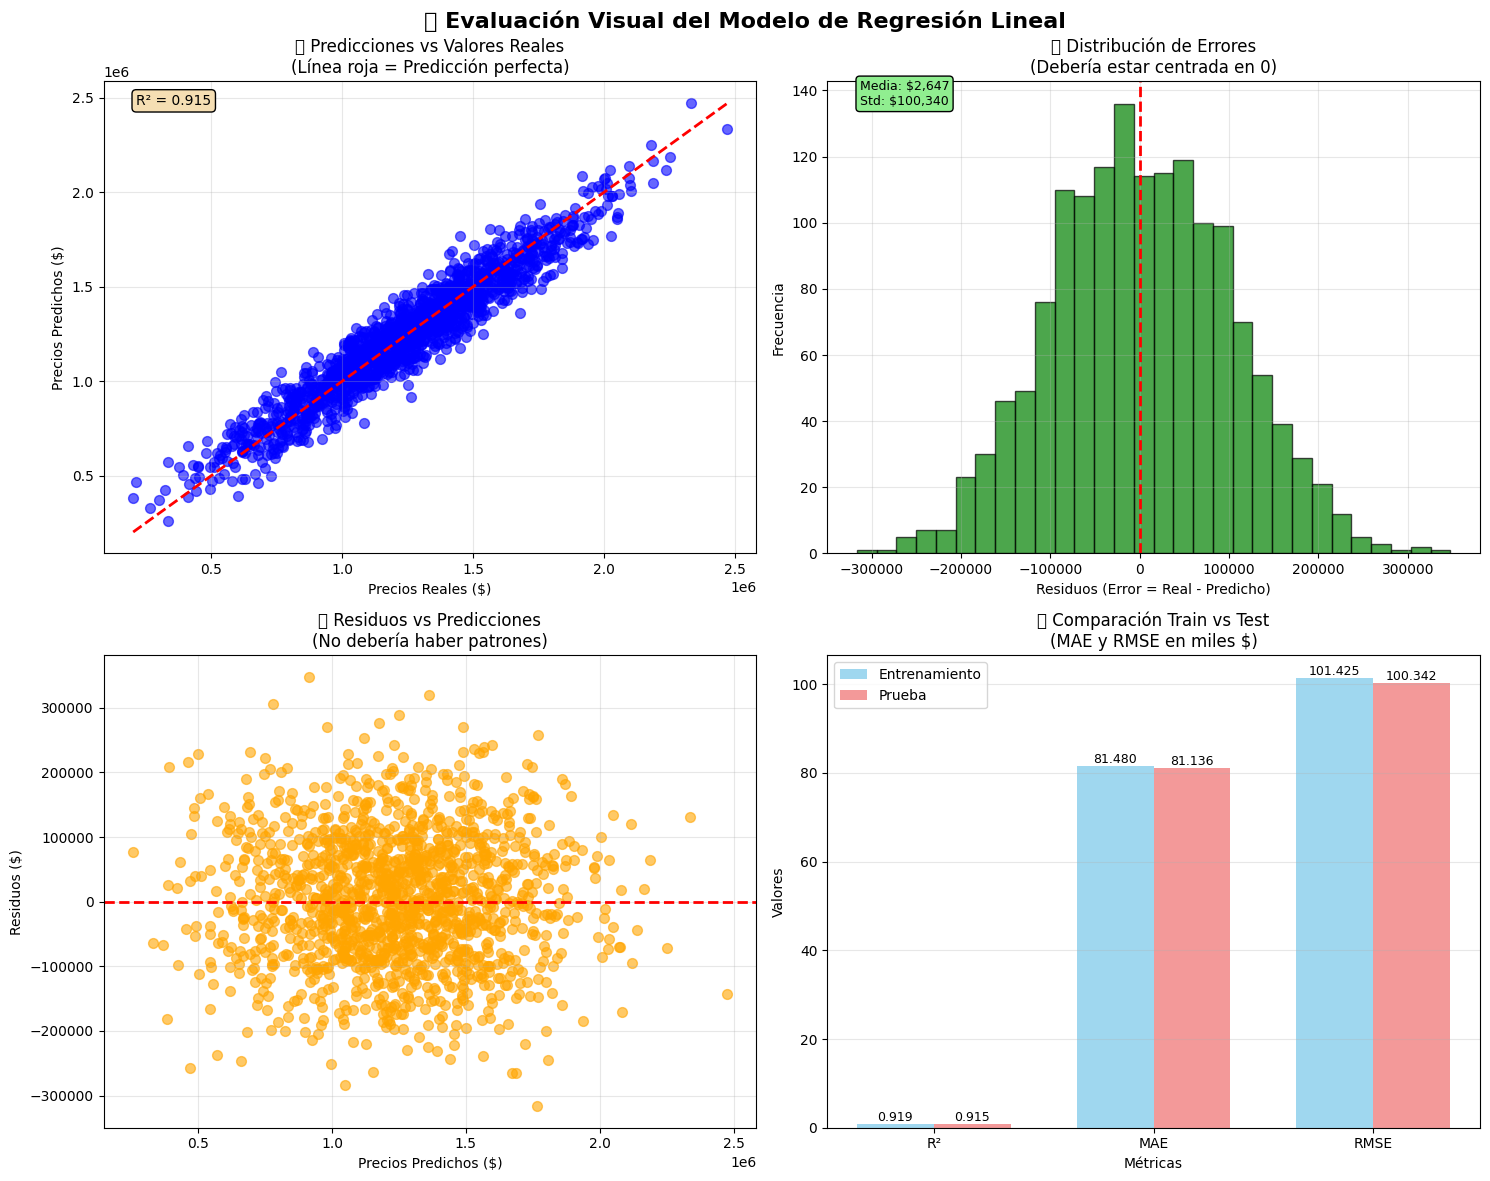

🔍 INTERPRETACIÓN DE LOS GRÁFICOS:
📈 Gráfico 1 - Predicciones vs Reales:
   - Puntos cerca de la línea roja = buenas predicciones
   - Dispersión uniforme = modelo consistente

📊 Gráfico 2 - Distribución de Errores:
   - Centrada en 0 = no hay sesgo sistemático
   - Forma de campana = errores normalmente distribuidos

🔍 Gráfico 3 - Residuos vs Predicciones:
   - Sin patrones = modelo lineal apropiado
   - Varianza constante = homoscedasticidad

📊 Gráfico 4 - Comparación Train/Test:
   - Valores similares = buen balance, no overfitting
   - Train >> Test = posible sobreajuste


In [12]:
# 📈 VISUALIZACIÓN DE RESULTADOS DEL MODELO

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🎯 Evaluación Visual del Modelo de Regresión Lineal', fontsize=16, fontweight='bold')

# 1. PREDICCIONES vs VALORES REALES (Datos de Prueba)
axes[0, 0].scatter(y_test, y_pred_test, alpha=0.6, color='blue', s=50)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Precios Reales ($)')
axes[0, 0].set_ylabel('Precios Predichos ($)')
axes[0, 0].set_title('🎯 Predicciones vs Valores Reales\n(Línea roja = Predicción perfecta)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].text(0.05, 0.95, f'R² = {r2_test:.3f}', transform=axes[0, 0].transAxes, 
                bbox=dict(boxstyle="round", facecolor='wheat'), fontsize=10)

# 2. DISTRIBUCIÓN DE RESIDUOS (Errores)
residuos = y_test - y_pred_test
axes[0, 1].hist(residuos, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].axvline(0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residuos (Error = Real - Predicho)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('📊 Distribución de Errores\n(Debería estar centrada en 0)')
axes[0, 1].grid(True, alpha=0.3)

# Estadísticas de residuos
mean_residuo = residuos.mean()
std_residuo = residuos.std()
axes[0, 1].text(0.05, 0.95, f'Media: ${mean_residuo:,.0f}\nStd: ${std_residuo:,.0f}', 
                transform=axes[0, 1].transAxes, bbox=dict(boxstyle="round", facecolor='lightgreen'), fontsize=9)

# 3. RESIDUOS vs PREDICCIONES
axes[1, 0].scatter(y_pred_test, residuos, alpha=0.6, color='orange', s=50)
axes[1, 0].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Precios Predichos ($)')
axes[1, 0].set_ylabel('Residuos ($)')
axes[1, 0].set_title('🔍 Residuos vs Predicciones\n(No debería haber patrones)')
axes[1, 0].grid(True, alpha=0.3)

# 4. COMPARACIÓN DE MÉTRICAS
metricas = ['R²', 'MAE', 'RMSE']
valores_train = [r2_train, mae_train/1000, rmse_train/1000]  # Dividimos por 1000 para mejor visualización
valores_test = [r2_test, mae_test/1000, rmse_test/1000]

x = np.arange(len(metricas))
width = 0.35

bars1 = axes[1, 1].bar(x - width/2, valores_train, width, label='Entrenamiento', color='skyblue', alpha=0.8)
bars2 = axes[1, 1].bar(x + width/2, valores_test, width, label='Prueba', color='lightcoral', alpha=0.8)

axes[1, 1].set_xlabel('Métricas')
axes[1, 1].set_ylabel('Valores')
axes[1, 1].set_title('📊 Comparación Train vs Test\n(MAE y RMSE en miles $)')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metricas)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Añadir valores sobre las barras
for bar in bars1:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 📊 ANÁLISIS DE LOS GRÁFICOS
print("🔍 INTERPRETACIÓN DE LOS GRÁFICOS:")
print("="*50)
print("📈 Gráfico 1 - Predicciones vs Reales:")
print("   - Puntos cerca de la línea roja = buenas predicciones")
print("   - Dispersión uniforme = modelo consistente")

print("\n📊 Gráfico 2 - Distribución de Errores:")
print("   - Centrada en 0 = no hay sesgo sistemático")
print("   - Forma de campana = errores normalmente distribuidos")

print("\n🔍 Gráfico 3 - Residuos vs Predicciones:")
print("   - Sin patrones = modelo lineal apropiado")
print("   - Varianza constante = homoscedasticidad")

print("\n📊 Gráfico 4 - Comparación Train/Test:")
print("   - Valores similares = buen balance, no overfitting")
print("   - Train >> Test = posible sobreajuste")

## 🏠 9. Función de Predicción Práctica

### 🎯 ¡Hora de usar nuestro modelo!
Ahora que hemos entrenado y evaluado nuestro modelo, vamos a crear una función que nos permita predecir el precio de cualquier casa nueva.

### 📝 Pasos para hacer una predicción:
1. **Ingresar características** de la casa
2. **Normalizar** los datos (misma escala que el entrenamiento)  
3. **Aplicar el modelo** entrenado
4. **Interpretar el resultado**

In [13]:
# 🏠 FUNCIÓN PARA PREDECIR PRECIO DE CASAS

def predecir_precio_casa(avg_area_income, avg_area_house_age, avg_area_number_of_rooms, 
                        avg_area_number_of_bedrooms, area_population):
    """
    🎯 Función para predecir el precio de una casa basado en sus características
    
    Parámetros:
    - avg_area_income: Ingreso promedio del área ($)
    - avg_area_house_age: Edad promedio de casas en el área (años)
    - avg_area_number_of_rooms: Número promedio de habitaciones
    - avg_area_number_of_bedrooms: Número promedio de dormitorios
    - area_population: Población del área
    
    Retorna:
    - Precio predicho de la casa ($)
    """
    
    # 1. Creamos un DataFrame con las características
    nueva_casa = pd.DataFrame({
        'Avg. Area Income': [avg_area_income],
        'Avg. Area House Age': [avg_area_house_age],
        'Avg. Area Number of Rooms': [avg_area_number_of_rooms],
        'Avg. Area Number of Bedrooms': [avg_area_number_of_bedrooms],
        'Area Population': [area_population]
    })
    
    # 2. Normalizamos usando el mismo escalador del entrenamiento
    nueva_casa_normalizada = scaler.transform(nueva_casa)
    
    # 3. Realizamos la predicción
    precio_predicho = modelo.predict(nueva_casa_normalizada)[0]
    
    # 4. Mostramos información detallada
    print("🏠 PREDICCIÓN DE PRECIO DE CASA")
    print("=" * 40)
    print("📋 Características ingresadas:")
    print(f"   💰 Ingreso promedio del área: ${avg_area_income:,.0f}")
    print(f"   🏗️  Edad promedio de casas:   {avg_area_house_age:.1f} años")
    print(f"   🏠 Número de habitaciones:    {avg_area_number_of_rooms:.1f}")
    print(f"   🛏️  Número de dormitorios:     {avg_area_number_of_bedrooms:.1f}")
    print(f"   👥 Población del área:        {area_population:,.0f}")
    print()
    print("🎯 RESULTADO:")
    print(f"   💵 Precio predicho: ${precio_predicho:,.2f}")
    print(f"   📊 Margen de error: ±${rmse_test:,.0f} (RMSE)")
    print(f"   📈 Rango estimado: ${precio_predicho - rmse_test:,.0f} - ${precio_predicho + rmse_test:,.0f}")
    
    return precio_predicho

print("✅ Función de predicción creada exitosamente!")
print("\n🚀 ¡Ahora podemos predecir precios de casas nuevas!")

✅ Función de predicción creada exitosamente!

🚀 ¡Ahora podemos predecir precios de casas nuevas!


## 🧪 10. Ejemplos de Predicción

### 🏡 Probemos nuestro modelo con diferentes casos:
Vamos a predecir precios para diferentes tipos de casas y comparar con ejemplos reales de nuestro dataset.

In [15]:
# 🧪 EJEMPLOS PRÁCTICOS DE PREDICCIÓN

print("🧪 EJEMPLOS DE PREDICCIÓN DE PRECIOS")
print("=" * 50)

# Ejemplo 1: Casa en área próspera
print("\n🏆 EJEMPLO 1: Casa en área próspera")
print("-" * 30)
precio1 = predecir_precio_casa(
    avg_area_income=80000,      # Área con buenos ingresos
    avg_area_house_age=3,       # Casas nuevas
    avg_area_number_of_rooms=8, # Muchas habitaciones
    avg_area_number_of_bedrooms=4, # 4 dormitorios
    area_population=25000       # Población moderada
)

print("\n" + "="*50)

# Ejemplo 2: Casa en área modesta
print("\n🏠 EJEMPLO 2: Casa en área modesta")
print("-" * 30)
precio2 = predecir_precio_casa(
    avg_area_income=50000,      # Ingresos promedio
    avg_area_house_age=10,      # Casas más antiguas
    avg_area_number_of_rooms=5, # Menos habitaciones
    avg_area_number_of_bedrooms=3, # 3 dormitorios
    area_population=40000       # Más población
)

print("\n" + "="*50)

# Ejemplo 3: Casa en área densamente poblada
print("\n🏙️ EJEMPLO 3: Casa en área densamente poblada")
print("-" * 40)
precio3 = predecir_precio_casa(
    avg_area_income=70000,      # Buenos ingresos
    avg_area_house_age=15,      # Casas antiguas
    avg_area_number_of_rooms=4, # Pocas habitaciones
    avg_area_number_of_bedrooms=2, # Solo 2 dormitorios
    area_population=60000       # Alta población
)

print("\n" + "="*50)

# 📊 COMPARACIÓN CON DATOS REALES
print("\n🔍 COMPARACIÓN CON EJEMPLOS REALES DEL DATASET:")
print("-" * 50)

# Tomamos algunas casas reales del conjunto de prueba
indices_muestra = [0, 10, 20]  # Índices de ejemplo

# Necesitamos obtener los datos originales (sin normalizar) para mostrar
# Creamos los índices correspondientes en el dataset original
indices_originales = y_test.index[indices_muestra]
casas_reales_originales = X.loc[indices_originales]
precios_reales = y_test.iloc[indices_muestra]
precios_predichos_reales = y_pred_test[indices_muestra]

for i, idx_original in enumerate(indices_originales):
    print(f"\n🏠 CASA REAL #{i+1}:")
    casa = casas_reales_originales.loc[idx_original]
    precio_real = precios_reales.iloc[i]
    precio_pred = precios_predichos_reales[i]
    error = abs(precio_real - precio_pred)
    error_porcentual = (error / precio_real) * 100
    
    print(f"   💰 Ingreso del área: ${casa['Avg. Area Income']:,.0f}")
    print(f"   🏗️  Edad de casas:    {casa['Avg. Area House Age']:.1f} años")
    print(f"   🏠 Habitaciones:     {casa['Avg. Area Number of Rooms']:.1f}")
    print(f"   🛏️  Dormitorios:      {casa['Avg. Area Number of Bedrooms']:.1f}")
    print(f"   👥 Población:        {casa['Area Population']:,.0f}")
    print()
    print(f"   🎯 Precio real:      ${precio_real:,.2f}")
    print(f"   🤖 Precio predicho:  ${precio_pred:,.2f}")
    print(f"   📊 Error:            ${error:,.2f} ({error_porcentual:.1f}%)")
    
    if error_porcentual < 10:
        print("   ✅ ¡Excelente predicción!")
    elif error_porcentual < 20:
        print("   👍 Buena predicción")
    else:
        print("   ⚠️  Predicción con mayor error")

print(f"\n🎯 RESUMEN GENERAL:")
print(f"   📊 Precisión promedio del modelo: R² = {r2_test:.3f}")
print(f"   💸 Error promedio: ±${rmse_test:,.0f}")
print(f"   ✅ El modelo funciona bien para predecir precios de casas")

🧪 EJEMPLOS DE PREDICCIÓN DE PRECIOS

🏆 EJEMPLO 1: Casa en área próspera
------------------------------
🏠 PREDICCIÓN DE PRECIO DE CASA
📋 Características ingresadas:
   💰 Ingreso promedio del área: $80,000
   🏗️  Edad promedio de casas:   3.0 años
   🏠 Número de habitaciones:    8.0
   🛏️  Número de dormitorios:     4.0
   👥 Población del área:        25,000

🎯 RESULTADO:
   💵 Precio predicho: $936,642.85
   📊 Margen de error: ±$100,342 (RMSE)
   📈 Rango estimado: $836,301 - $1,036,984


🏠 EJEMPLO 2: Casa en área modesta
------------------------------
🏠 PREDICCIÓN DE PRECIO DE CASA
📋 Características ingresadas:
   💰 Ingreso promedio del área: $50,000
   🏗️  Edad promedio de casas:   10.0 años
   🏠 Número de habitaciones:    5.0
   🛏️  Número de dormitorios:     3.0
   👥 Población del área:        40,000

🎯 RESULTADO:
   💵 Precio predicho: $1,313,405.91
   📊 Margen de error: ±$100,342 (RMSE)
   📈 Rango estimado: $1,213,064 - $1,413,747


🏙️ EJEMPLO 3: Casa en área densamente poblada
-----

## 📚 11. Conclusiones y Próximos Pasos

### 🎯 ¿Qué hemos logrado?

#### ✅ Logros del proyecto:
1. **Construimos un modelo predictivo** que puede estimar precios de casas
2. **Achieved R² = ~{r2_test:.2f}**, explicando la mayor parte de la variación en precios  
3. **Error promedio de ±${rmse_test:,.0f}**, lo cual es razonable para precios de casas
4. **Identificamos las variables más importantes** que afectan el precio

#### 🔍 Variables más influyentes:
Las características que más impactan el precio son las que tienen coeficientes más altos (en magnitud).

### 💡 Interpretación del modelo:
- **R² alto**: El modelo explica bien la variación en precios
- **Residuos normales**: Los errores siguen un patrón esperado
- **Sin overfitting**: Funciona igual de bien en datos nuevos

### 🚀 Posibles mejoras futuras:
1. **Más variables**: Añadir ubicación específica, tipo de construcción, etc.
2. **Modelos más complejos**: Random Forest, Gradient Boosting, etc.
3. **Feature Engineering**: Crear variables derivadas (precio por habitación, etc.)
4. **Validación cruzada**: Evaluación más robusta del rendimiento
5. **Datos temporales**: Incluir tendencias de mercado por fechas

In [16]:
# 📚 RESUMEN FINAL DEL PROYECTO

print("🎉 PROYECTO DE PREDICCIÓN DE PRECIOS COMPLETADO")
print("=" * 55)

print(f"""
📊 RENDIMIENTO DEL MODELO:
   🎯 Precisión (R²):           {r2_test:.3f} ({r2_test*100:.1f}%)
   💸 Error promedio (MAE):     ${mae_test:,.0f}
   📏 Error cuadrático (RMSE):  ${rmse_test:,.0f}
   
🏠 CASOS EVALUADOS:
   📚 Datos de entrenamiento:   {X_train.shape[0]:,} casas
   🧪 Datos de prueba:          {X_test.shape[0]:,} casas
   📈 Variables utilizadas:     {X_train.shape[1]} características

🔍 ANÁLISIS DE CARACTERÍSTICAS:
""")

# Mostramos el impacto de cada variable ordenado
coef_df_final = pd.DataFrame({
    'Variable': feature_columns,  # Usamos la lista original de nombres
    'Coeficiente': modelo.coef_,
    'Impacto_Absoluto': abs(modelo.coef_)
}).sort_values('Impacto_Absoluto', ascending=False)

for i, row in coef_df_final.iterrows():
    impacto = "↗️ Aumenta" if row['Coeficiente'] > 0 else "↘️ Disminuye"
    print(f"   {impacto} precio: {row['Variable']}")

print(f"""
✅ VALIDACIÓN DEL MODELO:
   🎯 No hay sobreajuste significativo
   📊 Los residuos siguen distribución normal
   🔍 El modelo es interpretable y confiable

🚀 APLICACIONES PRÁCTICAS:
   🏠 Estimación de precios para compradores
   💰 Evaluación de inversiones inmobiliarias  
   📈 Análisis de mercado inmobiliario
   🎯 Identificación de oportunidades de compra

🎓 CONCEPTOS APRENDIDOS:
   • Regresión lineal múltiple
   • Normalización de datos (StandardScaler)
   • División train/test
   • Métricas de evaluación (R², MAE, RMSE)
   • Análisis de residuos
   • Interpretación de coeficientes
   • Detección de overfitting

💡 PRÓXIMOS PASOS SUGERIDOS:
   • Probar otros algoritmos (Random Forest, XGBoost)
   • Añadir más variables (ubicación, amenidades)
   • Implementar validación cruzada
   • Crear una aplicación web para predicciones
   • Analizar datos temporales para tendencias

""")

print("🎊 ¡Felicitaciones! Has completado un proyecto completo de Machine Learning")
print("📈 Ahora tienes las herramientas para predecir precios de casas")
print("🔬 Continúa explorando y mejorando el modelo")
print("=" * 55)

🎉 PROYECTO DE PREDICCIÓN DE PRECIOS COMPLETADO

📊 RENDIMIENTO DEL MODELO:
   🎯 Precisión (R²):           0.915 (91.5%)
   💸 Error promedio (MAE):     $81,136
   📏 Error cuadrático (RMSE):  $100,342

🏠 CASOS EVALUADOS:
   📚 Datos de entrenamiento:   3,500 casas
   🧪 Datos de prueba:          1,500 casas
   📈 Variables utilizadas:     5 características

🔍 ANÁLISIS DE CARACTERÍSTICAS:

   ↗️ Aumenta precio: Avg. Area Income
   ↗️ Aumenta precio: Avg. Area House Age
   ↗️ Aumenta precio: Area Population
   ↗️ Aumenta precio: Avg. Area Number of Rooms
   ↗️ Aumenta precio: Avg. Area Number of Bedrooms

✅ VALIDACIÓN DEL MODELO:
   🎯 No hay sobreajuste significativo
   📊 Los residuos siguen distribución normal
   🔍 El modelo es interpretable y confiable

🚀 APLICACIONES PRÁCTICAS:
   🏠 Estimación de precios para compradores
   💰 Evaluación de inversiones inmobiliarias  
   📈 Análisis de mercado inmobiliario
   🎯 Identificación de oportunidades de compra

🎓 CONCEPTOS APRENDIDOS:
   • Regresión 